In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_ICC = pd.read_csv('../Output/Submission/features/Manual_ICC_Values.csv')
df_ICC['ICC'] = df_ICC['ICC'].abs()

df_ICC

,Feature,Fraction,ICC,ICC_Class,MeanICC,MeanICC_Class,Remove
0,firstorder_10Percentile,1,0.943922,Excellent,0.908530,Excellent,No
1,firstorder_10Percentile,2,0.939978,Excellent,0.908530,Excellent,No
2,firstorder_10Percentile,3,0.946706,Excellent,0.908530,Excellent,No
3,firstorder_10Percentile,4,0.793194,Good,0.908530,Excellent,No
4,firstorder_10Percentile,5,0.918848,Excellent,0.908530,Excellent,No
...,...,...,...,...,...,...,...
520,shape_VoxelVolume,1,0.862797,Good,0.822881,Good,No
521,shape_VoxelVolume,2,0.853358,Good,0.822881,Good,No
522,shape_VoxelVolume,3,0.859484,Good,0.822881,Good,No
523,shape_VoxelVolume,4,0.777337,Good,0.822881,Good,No


In [16]:
# swarm plot of volume values
df_Volume = pd.read_csv('../Output/Submission/features/Manual_VolCorr_TP_Values.csv')
df_Volume

,Fraction,Feature,rho,rho_mean,Remove
0,1,firstorder_10Percentile,0.413560,0.465947,No
1,2,firstorder_10Percentile,0.319789,0.465947,No
2,3,firstorder_10Percentile,0.527862,0.465947,No
3,4,firstorder_10Percentile,0.581326,0.465947,No
4,5,firstorder_10Percentile,0.487199,0.465947,No
...,...,...,...,...,...
520,1,shape_VoxelVolume,1.000000,1.000000,Yes
521,2,shape_VoxelVolume,1.000000,1.000000,Yes
522,3,shape_VoxelVolume,1.000000,1.000000,Yes
523,4,shape_VoxelVolume,1.000000,1.000000,Yes


c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may wan

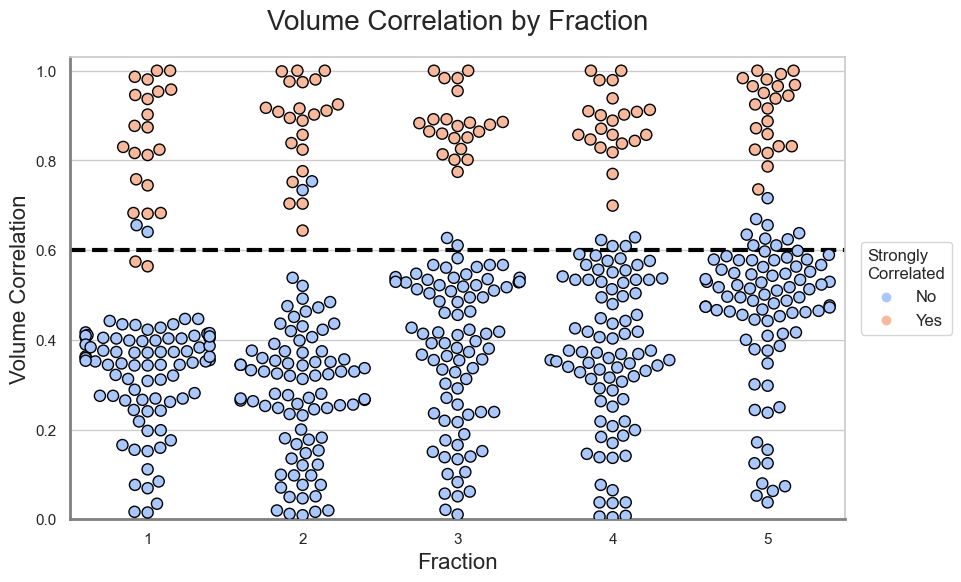

In [17]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_context("paper", font_scale=1.5)
sns.set_theme(style="whitegrid", rc=custom_params)
sns.swarmplot(x='Fraction', y='rho', data=df_Volume, hue='Remove', palette='coolwarm', size=8, edgecolor='black', linewidth=1, ax=ax)
plt.legend(title='Strongly\nCorrelated', bbox_to_anchor=(1.02, 0.6), loc=2, borderaxespad=0.0, fontsize=12)
# plt horizonal line at 0
plt.axhline(0.6, color='black', linewidth=3, linestyle='--')
plt.ylim(0,1.03)
plt.title('Volume Correlation by Fraction', fontsize=20, pad=20)
plt.xlabel('Fraction', fontsize=16)
plt.ylabel('Volume Correlation', fontsize=16)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.spines[axis].set_color('grey')

plt.savefig('./Swarm-Volume.png', dpi=300, bbox_inches='tight')

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may w

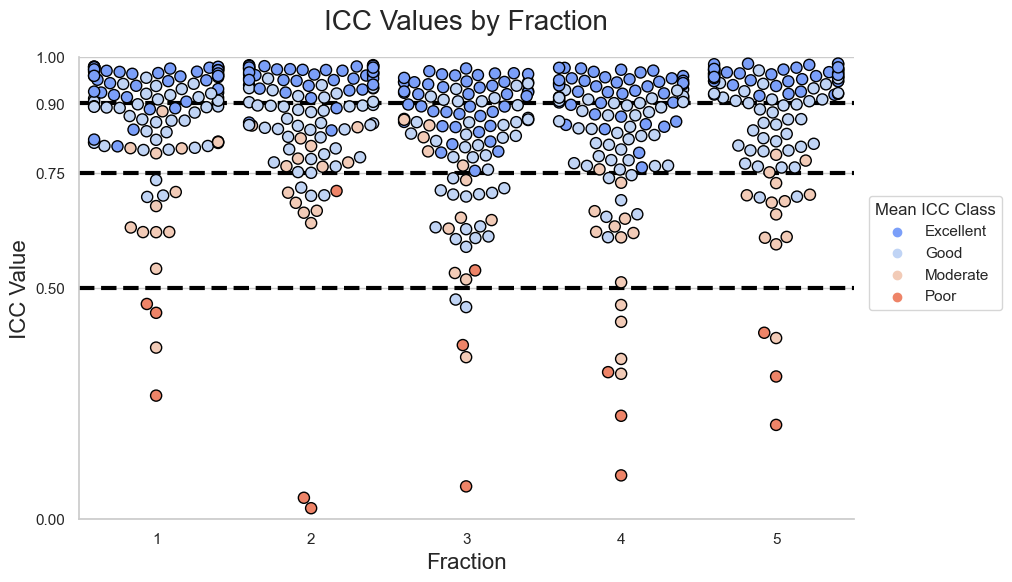

In [18]:
# swarm plot by fraction and ICC value
plt.figure(figsize=(10, 6))
# sns.catplot(x='Fraction', y='ICC', data=df_ICC, kind='swarm', hue='MeanICC_Class', palette='coolwarm', size=8, edgecolor='black', linewidth=1)
sns.swarmplot(x='Fraction', y='ICC', data=df_ICC, hue='MeanICC_Class', palette='coolwarm', size=8, edgecolor='black', linewidth=1)
# remove the catplot legend
#plt.legend().remove()
plt.legend(title='Mean ICC Class', bbox_to_anchor=(1.02, 0.7), loc=2, borderaxespad=0.0)
plt.yticks([0, 0.5, 0.75, 0.9, 1])
plt.ylim(0, 1)
plt.axhline(0.75, color='black', linewidth=3, linestyle='--')
plt.axhline(0.9, color='black', linewidth=3, linestyle='--')
plt.axhline(0.5, color='black', linewidth=3, linestyle='--')

plt.title('ICC Values by Fraction', fontsize=20, pad=20)
plt.xlabel('Fraction', fontsize=16)
plt.ylabel('ICC Value', fontsize=16)



plt.savefig('./Swarm-ICC.png', dpi=300, bbox_inches='tight')